### <font color='#00d2d3'> Importer les packages

In [59]:
# Importer les packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords') # Télécharger le package stopwords
nltk.download('wordnet')
from nltk.corpus import stopwords # Importer le package stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <font color='#00d2d3'> Importer et lire les données

In [61]:
# Importer les données
df=pd.read_csv('/content/drive/MyDrive/NLP/tweet_data.csv')
# Afficher les données
df.head()

,label,tweet
0,1,@user homegrown rightie white americans are 10...
1,1,"@user @user is this a new one? either way, #m..."
2,0,i am thankful for pillows. #thankful #positive...
3,0,it's unfounate today that aids is under contro...
4,0,i am super. #i_am #positive #affirmation


- 1 : Negative
- 0 : Positive

In [62]:
# Dimension des données
df.shape

(4484, 2)

### <font color='#00d2d3'> Pré-traitement des données

In [63]:
# Nombre d'observations dans chaque classe
df.label.value_counts()

1    2242
0    2242
Name: label, dtype: int64

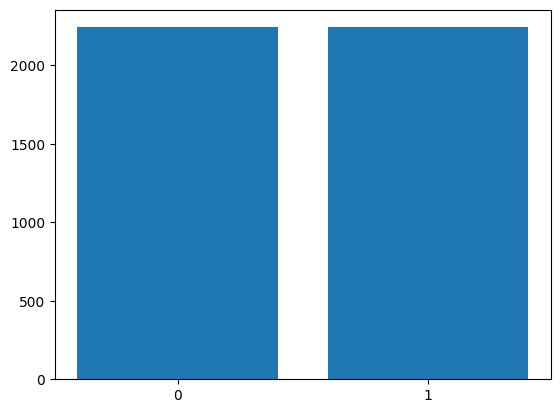

In [64]:
# Bar plot des nombres d'observations dans chaque classe
plt.bar(df.label.value_counts().index, df.label.value_counts().values)
plt.xticks(df.label.value_counts().index)
plt.show()

#### <font color='#00d2d3'> Pré-traitement des données textuelles

In [65]:
# Afficher la première ligne de la colonne text
df['tweet'][0]

'@user homegrown rightie white americans are 100 times more likely to harm you than a refugee.  #fear'

In [66]:
# Afficher la deuxième ligne de la colonne text
df['tweet'][1]

'@user @user  is this a new one? either way, #men disgraced themselves.  #harassment  #verbalassault'

###### <font color='#1dd1a1'> Commencer le nettoyage des tweets


In [67]:
# Fonction supprimant les links
def remove_links(tweet):
  tweet=re.sub(r'http:?//\S+|https:?//\S+', '',tweet)
  return tweet


In [68]:
# Exemple
tweet ='The urls of my webpages is http://abdoulwahab.com https://abdoul.com'
tweet = remove_links(tweet)

In [69]:
# Fonction supprimant les @username
def remove_users(tweet):
  tweet=re.sub(r'@[\w\-\._]+','', tweet) # oU re.sub(r'@[a-zA-Z0-9-._]+','', tweet
  return tweet


In [70]:
# Exemple
tweet ='My username is @abdwahdia'
tweet = remove_users(tweet)
tweet

'My username is '

In [71]:
# Supprimer les adresses emails
def email_address(text):
  tweet=re.sub(r'[\w\-\._]+@[\w\-\.]+','', text)
  return tweet

In [72]:
# Exemple
tweet ='My email adress is the following : abdoulwahabdiall@gmail.com'
tweet = email_address(tweet)
tweet

'My email adress is the following : '

In [73]:
!pip install contractions

In [74]:
import contractions
# Fonction étendant les contractions
def contraction(tweet):
    expanded_all = []
    for word in tweet.split():
        expanded_all.append(contractions.fix(word)) # utiliser la fonction fix de contractions

    expand = ' '.join(expanded_all)
    return expand

In [75]:
# Exemple
tweet ="That's the right thing to do"
tweet = contraction(tweet)
tweet

'That is the right thing to do'

In [76]:
# Supprimer html caractères
def clean_html(text):
  tweet = re.sub(r'&\w+','', text)
  return tweet

In [77]:
# Exemple
tweet ='#world What a shame &amp'
tweet = clean_html(tweet)
tweet

'#world What a shame '

In [78]:
# Remplacer tout ce qui n'est chaines de caractères alphabétiques et espace par ' '
def alpha_b(text):
  tweet = re.sub(r'[^a-zA-Z\s]+',' ', text)
  return tweet

In [79]:
# Exemple
tweet = 'My year of birth is 2050 #happy'
tweet = alpha_b(tweet)
tweet

'My year of birth is    happy'

In [80]:
# Fonction remplaçant les espaces multiples et convertissant majuscules en minuscules
def lower(text):
  tweet=re.sub(r'\s{2,}', ' ', text)
  return tweet.lower()

In [81]:
# Supprimer les espaces en début et fin de tweet
def clean_space(text):
  tweet = re.sub(r'^\s|\s$', '', text)
  return tweet

In [82]:
# Fonction supprimant les stopwords
def remove_stopwords(text):
    Stopwords = stopwords.words('english')
    tweet= ' '.join([word for word in text.split() if word not in Stopwords])
    return tweet

In [83]:
# Exemple
tweet = ' Life is a mess for some people  '
tweet = clean_space(tweet)
tweet

'Life is a mess for some people '

In [84]:
# Exemple
tweet = 'Life is a mess for some people'
tweet = remove_stopwords(tweet)
tweet

'Life mess people'

In [85]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()
def lem_sw(text):
    tweet = [lemma.lemmatize(word) for word in text.split()]
    tweet = " ".join(tweet)
    return tweet

###### <font color='#1dd1a1'> Appliquer les différentes fonctions sur les tweets



In [86]:
# Appliquer la fonction remove_users
df['new_tweet']= df.tweet.apply(func= remove_users)
# Appliquer la fonction remove_links
df['new_tweet']= df.new_tweet.apply(func= remove_links)
# Appliquer la fonction email_address
df['new_tweet']= df.new_tweet.apply(func= email_address)
# Appliquer la fonction remove_contraction
df['new_tweet']= df.new_tweet.apply(func= contraction)
# Appliquer la fonction clean_html
df['new_tweet']= df.new_tweet.apply(func= clean_html)
# Appliquer la fonction alpha_b
df['new_tweet']= df.new_tweet.apply(func= alpha_b)
# Appliquer la fonction lower
df['new_tweet']= df.new_tweet.apply(func= lower)
# Appliquer la fonction clean_space
df['new_tweet']= df.new_tweet.apply(func= clean_space)
# Appliquer la fonction remove_stopwords
df['new_tweet']= df.new_tweet.apply(func= remove_stopwords)
# Appliquer la fonction lem_sw
df['new_tweet']= df.new_tweet.apply(func= lem_sw)

In [87]:
# Afficher df
df.head()

,label,tweet,new_tweet
0,1,@user homegrown rightie white americans are 10...,homegrown rightie white american time likely h...
1,1,"@user @user is this a new one? either way, #m...",new one either way men disgraced harassment ve...
2,0,i am thankful for pillows. #thankful #positive...,thankful pillow thankful positive
3,0,it's unfounate today that aids is under contro...,unfounate today aid control hate kill gay year...
4,0,i am super. #i_am #positive #affirmation,super positive affirmation


#Par nous

In [112]:
df1=df

In [113]:
df1 = df1.drop('tweet', axis=1)

In [114]:
df1.head()

,label,new_tweet
0,1,homegrown rightie white american time likely h...
1,1,new one either way men disgraced harassment ve...
2,0,thankful pillow thankful positive
3,0,unfounate today aid control hate kill gay year...
4,0,super positive affirmation


In [115]:
df_copy = df1.copy()

In [116]:
df_copy.to_csv('tweet_clean.csv', index=False)

In [90]:
import os
file_path = os.path.abspath('tweet_clean.csv')
print(file_path)


/content/tweet_clean.csv


In [91]:
# Afficher la ligne d'index 0
df['new_tweet'][0]

'homegrown rightie white american time likely harm refugee fear'

In [92]:
# Afficher la ligne d'index 1
df['new_tweet'][1]


'new one either way men disgraced harassment verbalassault'

### <font color='#00d2d3'> Vectorisation

In [93]:
# Importer les packages
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [94]:
# Nombre de mots
voc_size = len(set(" ".join(df.new_tweet).split()))
# Initialiser le modèle Tokenizer
tokenizer = Tokenizer(num_words=voc_size, split=' ')
# Entrainer les données
tokenizer.fit_on_texts(df['new_tweet'].values)
# Vectoriser
X = tokenizer.texts_to_sequences(df['new_tweet'].values)
# Padding
X = pad_sequences(X)

### <font color='#00d2d3'> Sentiment Analysis avec Bi-directional LSTM

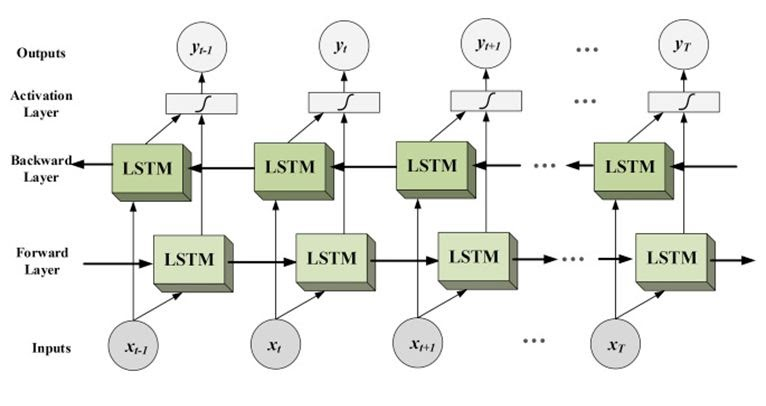

In [95]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional, Dropout

In [96]:
# Dimension des vecteurs
emb_dim=100
model=Sequential()
model.add(Embedding(voc_size, emb_dim, input_length=X.shape[1]))
model.add(Bidirectional(LSTM(200, return_sequences=True)))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(200)))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))
# Compiler le modèle
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Afficher le summary
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 21, 100)           959100    
                                                                 
 bidirectional_2 (Bidirecti  (None, 21, 400)           481600    
 onal)                                                           
                                                                 
 dropout_4 (Dropout)         (None, 21, 400)           0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 400)               961600    
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [97]:
# Importer train_test_split
from sklearn.model_selection import train_test_split
# Labels
y =df.label.values
# Splitter en train, validation et test
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
#Splitter validation et test
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test,test_size=0.5, random_state=42)

In [98]:
# Entrainer le modèle
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=64)

Epoch 1/5
57/57 [==============================] - 30s 290ms/step - loss: 0.5220 - accuracy: 0.7081 - val_loss: 0.3097 - val_accuracy: 0.8638
Epoch 2/5
57/57 [==============================] - 7s 122ms/step - loss: 0.1469 - accuracy: 0.9512 - val_loss: 0.3231 - val_accuracy: 0.8728
Epoch 3/5
57/57 [==============================] - 3s 49ms/step - loss: 0.0410 - accuracy: 0.9866 - val_loss: 0.4531 - val_accuracy: 0.8772
Epoch 4/5
57/57 [==============================] - 2s 30ms/step - loss: 0.0207 - accuracy: 0.9944 - val_loss: 0.6486 - val_accuracy: 0.8571
Epoch 5/5
57/57 [==============================] - 2s 35ms/step - loss: 0.0116 - accuracy: 0.9975 - val_loss: 0.6384 - val_accuracy: 0.8683


In [99]:
# Importer accuracy_score
from sklearn.metrics import accuracy_score

# Prédire les labels de x_test
y_pred=model.predict(x_val)
# Arrondir les valeurs
y_pred=np.round(y_pred)
# Afficher l'accuracy
print('Accuracy score: ', accuracy_score(y_pred, y_val))

14/14 [==============================] - 2s 7ms/step
Accuracy score:  0.8683035714285714


###### <font color='#1dd1a1'> Test le modèle

In [100]:
# x_test tweet non vectoriséés
tweet =tokenizer.sequences_to_texts(x_test[:3])
# x_test tweet vctorisées
twt=x_test[:3]

In [101]:
# Prédictions les labels
y_pred=model.predict(twt)
# Arrondir les valeus
y_pred = np.round(y_pred)

1/1 [==============================] - 2s 2s/step


In [102]:
# Afficher sentiments
for i in range(0,2):
  print(tweet[i],"---------",["Negative sentiment" if int(y_pred[i])== 1 else "Positive sentiment"],"----",["Negative sentiment" if int(y_test[i]==1)else "Positive sentiment"])

sma think hate white male hate racism sexism grow brain right winger p --------- ['Negative sentiment'] ---- ['Negative sentiment']
girl get fuck bondage leather girl --------- ['Negative sentiment'] ---- ['Negative sentiment']


In [103]:
# x_test tweet non vectoriséés
tweet =tokenizer.sequences_to_texts(x_test[4:6])
# x_test tweet vctorisées
twt=x_test[4:6]


In [104]:
# Afficher sentiments
for i in range(0,2):
  print(tweet[i],"---------",["Negative sentiment" if int(y_pred[i])== 1 else "Positive sentiment"],"----",["Negative sentiment" if int(y_test[i]==1)else "Positive sentiment"])

heading graduation mechtechplumbing futureplumber proudmama --------- ['Negative sentiment'] ---- ['Negative sentiment']
want obama catch mad cow disease caught w herford dy trial buried cow pasture --------- ['Negative sentiment'] ---- ['Negative sentiment']


In [105]:
tweet=['You are a negative person Inever like','I like eating good food when I am really hungry']
#x_
twt=pad_sequences(tokenizer.texts_to_sequences(tweet),X.shape[1])
twt

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0, 1852,  222,    4],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    4, 2699,   19,  290,   64, 2229]],
      dtype=int32)

### <font color='#00d2d3'> Sentiment Analysis avec LSTM

In [106]:
# Dimension des vecteurs
emb_dim=100
model=Sequential()
model.add(Embedding(voc_size, emb_dim, input_length=X.shape[1]))
model.add(LSTM(200, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(200))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))
# Compiler le modèle
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Afficher le summary
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 21, 100)           959100    
                                                                 
 lstm_6 (LSTM)               (None, 21, 200)           240800    
                                                                 
 dropout_6 (Dropout)         (None, 21, 200)           0         
                                                                 
 lstm_7 (LSTM)               (None, 200)               320800    
                                                                 
 dropout_7 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 1520901 (5.80 MB)
Trainable params: 1520

In [107]:
# Entrainer le modèle
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=64)

Epoch 1/5
57/57 [==============================] - 10s 99ms/step - loss: 0.6027 - accuracy: 0.6638 - val_loss: 0.3613 - val_accuracy: 0.8192
Epoch 2/5
57/57 [==============================] - 4s 62ms/step - loss: 0.2069 - accuracy: 0.9219 - val_loss: 0.3208 - val_accuracy: 0.8571
Epoch 3/5
57/57 [==============================] - 3s 43ms/step - loss: 0.0676 - accuracy: 0.9777 - val_loss: 0.3551 - val_accuracy: 0.8750
Epoch 4/5
57/57 [==============================] - 2s 41ms/step - loss: 0.0301 - accuracy: 0.9891 - val_loss: 0.4634 - val_accuracy: 0.8661
Epoch 5/5
57/57 [==============================] - 1s 19ms/step - loss: 0.0164 - accuracy: 0.9936 - val_loss: 0.5971 - val_accuracy: 0.8705


In [108]:
# Importer accuracy_score
from sklearn.metrics import accuracy_score

# Prédire les labels de x_test
y_pred=model.predict(x_val)
# Arrondir les valeurs
y_pred=np.round(y_pred)
# Afficher l'accuracy
print('Accuracy score: ', accuracy_score(y_pred, y_val))

14/14 [==============================] - 1s 4ms/step
Accuracy score:  0.8705357142857143


### <font color='#00d2d3'> Sentiment Analysis avec Transformers modèle

In [109]:
!pip install transformers

In [110]:
# Importer transformers
import transformers

In [111]:
# Import pipeline
from transformers import pipeline
# Initialiser le modèle
sentiment_pipeline = pipeline("sentiment-analysis")
# Appliquer le modèle
sentiment_pipeline('I like eating pizza when I am really hungry')


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9862363934516907}]